**Video Processing & Video Object Tracking**

--2021-03-11 13:22:44--  https://github.com/heshameraqi/Image_Processing_Computer_Vision_1/raw/main/tracking_slow_traffic_small.mp4
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/heshameraqi/Image_Processing_Computer_Vision_1/main/tracking_slow_traffic_small.mp4 [following]
--2021-03-11 13:22:44--  https://raw.githubusercontent.com/heshameraqi/Image_Processing_Computer_Vision_1/main/tracking_slow_traffic_small.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2018126 (1.9M) [application/octet-stream]
Saving to: ‘video.mp4’

video.mp4           100%[===================>]   1.92M  --.-KB/s    i

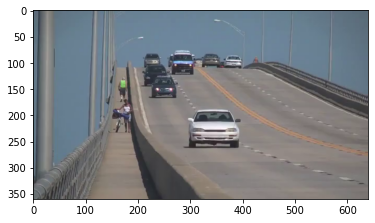

In [2]:
!wget -O video.mp4 https://github.com/heshameraqi/Image_Processing_Computer_Vision_1/raw/main/tracking_slow_traffic_small.mp4

import numpy as np
import cv2
import matplotlib.pyplot as plt
#from IPython.display import clear_output # To clear old figure
#from time import sleep

# Capture video and take first frame of the video
cap = cv2.VideoCapture('video.mp4')
ret, frame = cap.read()

print(ret)
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

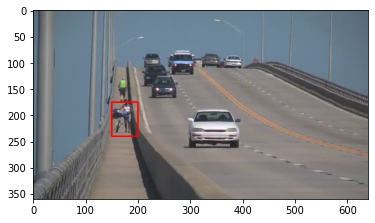

In [3]:
# Initial location of window r,h,c,w for tracked object
#start_y = 200
#height = 20
#start_x = 300
#width = 20
#track_window = (start_y,start_x,w,height)

plt.figure()
img_to_show = cv2.rectangle(frame, (150,175), (200,240), (0, 0, 255), 2)
plt.imshow(cv2.cvtColor(img_to_show, cv2.COLOR_BGR2RGB))
plt.figure()


In [ ]:

# Set up the object (ROI) for tracking
obj = frame[r:r+h, c:c+w]
hsv_obj =  cv2.cvtColor(frame, cv2.COLOR_BGR2HSV) # In OpenCV: H: 0-179, S: 0-255, V: 0-255
mask = cv2.inRange(hsv_obj, (0, 60,32), (180,255,255)) # Mask the vibrant colors (not white not black)
obj_hist = cv2.calcHist([hsv_obj],[0],mask,[180],[0,180]) # [0] means histogram of hsv_obj H channel only, masked by mask (vibrant), [180] bin count, in range of [0,180]

# Mean Shift algorithm termination criteria, either 10 iteration reached or move by at least 1 pt
term_crit = ( cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1 )
i = 0
while(True):
    ret, frame = cap.read()
    if ret == True:
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV) # New frame
        # Back Projection: find a feature in the new frame image by seaching for its histogram model, returns probability image
        dst = cv2.calcBackProject([hsv],[0], obj_hist, [0,180], 1)

        # Apply meanshift to get the new location
        ret, track_window = cv2.meanShift(dst, track_window)

        # Draw tracking result on image
        x,y,w,h = track_window
        img2 = cv2.rectangle(frame, (x,y), (x+w,y+h), 255,2)
        cv2.imwrite("Result%04d.jpg" % i, img2)
        i+=1
        '''clear_output()
        plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
        plt.show()
        sleep(1)'''
    else:
        break

cap.release() # Release video reader

# Create the resulted video file, then download it manually if needed and watch the result
!ffmpeg -framerate 30 -r 30 -i 'Result%04d.jpg' -vcodec mpeg4 -y result.mp4 # Save video
from google.colab import files
files.download('result.mp4')